In [1]:
import csv
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Gathering Data

## Archive

In [2]:
df_archive= pd.read_csv('twitter-archive-enhanced.csv')
df_archive_c=df_archive.copy()

## Image Prediction

In [3]:
df_image=pd.read_table('image-predictions.tsv')
df_image_c=df_image.copy()

## Twitter API

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
tweets = []  #storing each tweet data in a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [6]:
#relevant_keys=['id','full_text','retweet_count','favorite_count']
#tweet_n=[]
#for tweet in tweets:
 #   tweet_n.append({key:tweet[key] for key in relevant_keys})

In [7]:
df_tweet=pd.DataFrame.from_dict(tweets)
df_tweet_c=df_tweet.copy()

# Assessing Data

In [8]:
#Programmatic assessment: Displaying columns and data types in each of the df
df_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_image_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_tweet_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [11]:
# Visual Assessment: 
df_archive_c.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [12]:
df_image_c.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [13]:
df_tweet_c.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,89

In [14]:
#Assessing the name column in the archive dataframe
df_archive_c.name.value_counts() 

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Tucker             10
Lola               10
Penny              10
Winston             9
Bo                  9
the                 8
Sadie               8
Buddy               7
Bailey              7
an                  7
Toby                7
Daisy               7
Jax                 6
Dave                6
Milo                6
Stanley             6
Leo                 6
Jack                6
Rusty               6
Oscar               6
Bella               6
Scout               6
Koda                6
George              5
Oakley              5
Sammy               5
Chester             5
Finn                5
Phil                5
Louis               5
Larry               5
very                5
Alfie               5
Bentley             5
Gus                 5
Sunny               5
Cassie              4
Scooter             4
Carl                4
Maddie    

In [25]:
df_archive_c[df_archive_c.name.str.islower()].name.value_counts() #extracting names in the name column that don't start with uppercase - probably not really a name and need cleaning

a               53
the              6
an               6
very             4
one              4
just             3
quite            2
getting          2
my               1
this             1
all              1
not              1
space            1
incredibly       1
light            1
unacceptable     1
infuriating      1
by               1
his              1
actually         1
Name: name, dtype: int64

In [15]:
#looking at entries with name 'a' as a sample to check if there are really no names
df_archive_c[df_archive_c.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

From the assessment of 'name' above,it is clear that we can use the keyword "named" to extract names from texts and replace them in name column: e.g. 1853 Wylie
1955 Kip
This will be done in the cleaning section below

In [19]:
#Assessing the presence of photos from expanded_url column in archive dataframe
print(sum(df_archive_c.expanded_urls.str.contains('photo',na=False)), df_archive_c.shape[0])

2077 2356


There are 279 entries with no photos in them. These will be removed in the cleaning section below

Assessment: 
1. From the output above, the following tidiness and quality issues are detected:

a) Quality 
Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
Validity: we have the records, but they’re not valid, i.e., they don’t conform to a defined schema. A schema is a defined set of rules for data. 
Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient’s weight that is 5 lbs too heavy because the scale was faulty.
Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

- Validity: Keeping only relevant keys from each json entry (df_tweet)(as per project schema)
- Consistency: Change id field in df_tweet_c to tweet_id to enable merge
- Validity: Removing data entries for retweets/replies (as per project schema) (df_archive)
- Validity: Removing columns for retweets/replies from archive df(df_archive)
- Validity: Removing data entries with no photos in them (as per project schema)(df_archive)
- Accuracy: Taking out non-name entries in df_archive.name and correcting some + setting the rest to None
- Consistency: tweet_id should be object not integer (master dataset)
- Validity: Removing irrelevant/duplicate columns from (master dataset)

b) Tidiness 
Tidiness Rules
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.
Tidiness Issues
- Dog stages can be melted into one column: stage
- Reshaping image-predictions columns(px,px_conf,px_dog) into 3 columns only + 1 for prediction level
- Data spread across 3 different data frame. Data can be merged into one master dataframe using tweet_id with (inner) join 

# Cleaning Data

### Quality issue 1: Validity
Each tweet has a set of irrelevant columns in df_tweet_c

#### Define
Keeping only relevant columns from each json entry (tweet)(as per project schema)

In [20]:
relevant_columns=['id','retweet_count','favorite_count']
current_columns=df_tweet_c.columns
drop_columns=[x for x in list(current_columns) if x not in relevant_columns]
df_tweet_c.drop(columns=drop_columns, inplace=True)

#### Validate

In [21]:
df_tweet_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issue 2: Consistency
Change id field in df_tweet_c to tweet_id to enable merge

#### Define
Change id field in df_tweet_c to tweet_id to enable merge

In [22]:
df_tweet_c.rename(columns={'id':'tweet_id'},inplace=True)

#### Validate

In [23]:
df_tweet_c.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Quality issue 3: Validity
Removing data entries for retweets/replies (as per project schema) (df_archive)

#### Define
Removing non-null entries for retweets/replies (as per project schema)

In [24]:
#Removing rows that are for replies as they are not required for the project
df_archive_c=df_archive_c[df_archive_c.in_reply_to_status_id.isnull()]
#Removing rows that are for retweets as they are not required for the project
df_archive_c=df_archive_c[df_archive_c.retweeted_status_id.isnull()]

#### Validate

In [25]:
df_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Quality issue 4: Validity
Removing columns for retweets/replies from archive df(df_archive)

#### Define
Removing irrelevant columns for retweets/replies (as per project schema)

In [26]:
#Removing columns for retweets,replies and source
df_archive_c.dropna(axis=1,how='all',inplace=True)

#### Validate

In [27]:
df_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Quality issue 5: Validity
Removing data entries with no photos in them (as per project schema)(df_archive)
#### Define
Removing data entries with no photos in them (as per project schema)

In [28]:
df_archive_c=df_archive_c[df_archive_c.expanded_urls.str.contains('photo',na=False)] #excluding entries with no photos

#### Validate

In [29]:
print(sum(df_archive_c.expanded_urls.str.contains('photo',na=False)))
print(df_archive_c.shape[0])

1899
1899


All remaining entries contain photos

### Quality issue 6: Accuracy
Taking out non-name entries in df_archive.name and correcting some + setting the rest to None
#### Define
Identifying names that don't look like names in name column and correcting some of them + setting the rest to Non

In [30]:
index=df_archive_c[df_archive_c.name.str.islower()].index #extracting names after "named" in text field in dataframe
for i in range(len(index)):
    new_name='None'
    string=re.findall(r"[\w']+",df_archive_c.text[index[i]])
    for w,word in enumerate (string):
        if word=='named':
            new_name=string[w+1]
            print(index[i],new_name)
    df_archive_c.at[index[i],'name']=new_name #updating name field with the new name. all other lower-case names will be set to None

1853 Wylie
1955 Kip
2034 Jacob
2066 Rufus
2116 Spork
2125 Cherokee
2128 Hemry
2146 Alphred
2161 Alfredo
2191 Leroi
2204 Berta
2218 Chuk
2235 Alfonso
2249 Cheryl
2255 Jessiga
2264 Klint
2273 Kohl
2304 Pepe
2311 Octaviath
2314 Johm


In [31]:
#manually changing some names that are not perceeded by 'named' - based on visual check 
df_archive_c.at[369,'name']='Grace'
df_archive_c.at[649,'name']='Forrest'
df_archive_c.at[852,'name']='Zoey' 
df_archive_c.at[992,'name']='Quizno' 
df_archive_c.at[2287,'name']='Daryl' 

#### Validate

In [32]:
df_archive_c.loc[2128] #checking that the changes are reflected 2128 Hemry

tweet_id                                                                                                                                      670303360680108032
timestamp                                                                                                                              2015-11-27 18:09:09 +0000
source                                                                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN
expanded_urls                                                                                    https://twitter.com/dog_rates/status/670303360680108032/photo/1
rating_numerator                                                                                                                                               9
rating_denominator                

In [33]:
df_archive_c[df_archive_c.name.str.islower()] #checking for lower-case names. they should all be set to None

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Tidiness issue 1:
Dog stages can be melted into one column: stage
#### Define
Combining the 4 dog stages; doggo puuper puppo floofer in df_archive in one column 'stage'

In [34]:
sum(df_archive_c.doggo=='doggo'),sum(df_archive_c.puppo=='puppo'), sum(df_archive_c.floofer=='floofer'), sum(df_archive_c.pupper=='pupper')

(64, 23, 7, 199)

In [35]:
df_archive_c.rename(columns={'pupper':'stage'},inplace=True) #pupper has highest non-None count, changing column name to stage and merging the rest of the columns (doggo, floofer and puppo with it)
df_archive_c['stage']=df_archive_c.stage.replace('None','') + df_archive_c['puppo'].replace('None','') + df_archive_c['doggo'].replace('None','') + df_archive_c['floofer'].replace('None','')
df_archive_c['stage']=df_archive_c['stage'].replace('','None')
df_archive_c.drop(columns=['doggo','floofer','puppo'],inplace=True) #deleting columns for other dog stages

In [36]:
#splitting entries with multiple dog stage
df_archive_c.loc[df_archive_c.stage == 'pupperdoggo', 'stage'] = 'pupper, doggo'
df_archive_c.loc[df_archive_c.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
df_archive_c.loc[df_archive_c.stage == 'puppodoggo', 'stage'] = 'puppo, doggo'

#### Validate

In [37]:
df_archive_c.stage.value_counts() #checking that the value count for each stage is the same as before 'melting'

None              1615
pupper             192
doggo               55
puppo               22
pupper, doggo        7
floofer              6
puppo, doggo         1
doggo, floofer       1
Name: stage, dtype: int64

### Tidiness issue 2:
Reshaping image prediction columns of the data frame
#### Define
Reshaping image-predictions columns(px,px_conf,px_dog) into 3 columns only + 1 for prediction level

In [38]:
cols = ['tweet_id','jpg_url','img_num','prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
df_image_c.columns = cols

# Reshaping the dataframe
df_image_reshape = pd.wide_to_long(df_image_c, stubnames=['prediction', 'confidence', 'breed'], i=['tweet_id','jpg_url','img_num'], j='prediction_level', sep="_").reset_index()

#### Validate

In [39]:
df_image_reshape.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Tidiness issue 3:
Merging data from 3 different data frames into one dataframe
#### Define
Data spread across 3 different data frame. Data can be merged into one master dataframe using tweet_id with (inner) join

In [40]:
df_merged = pd.merge(df_image_reshape,df_archive_c,on ='tweet_id',how='inner')

In [41]:
df_merged = pd.merge(df_tweet_c,df_merged, on ='tweet_id',how='inner')
df_merged_c=df_merged.copy()

#### Validate

In [42]:
df_merged_c.info() #checking all columns transferred

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5697 entries, 0 to 5696
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5697 non-null   int64  
 1   retweet_count       5697 non-null   int64  
 2   favorite_count      5697 non-null   int64  
 3   jpg_url             5697 non-null   object 
 4   img_num             5697 non-null   int64  
 5   prediction_level    5697 non-null   int64  
 6   prediction          5697 non-null   object 
 7   confidence          5697 non-null   float64
 8   breed               5697 non-null   bool   
 9   timestamp           5697 non-null   object 
 10  source              5697 non-null   object 
 11  text                5697 non-null   object 
 12  expanded_urls       5697 non-null   object 
 13  rating_numerator    5697 non-null   int64  
 14  rating_denominator  5697 non-null   int64  
 15  name                5697 non-null   object 
 16  stage 

In [43]:
df_merged_c.head(1) #checking for a snippet of contents for duplicate information

,tweet_id,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None


### Quality issue 7: Validity
Removing irrelevant/duplicate columns from (master dataset)

#### Define
Removing irrelevant/duplicate columns from (master dataset): jpg_url and img_num and source

In [44]:
df_merged_c.drop(columns=['jpg_url','img_num','source'],inplace=True)

#### Validate

In [45]:
df_merged_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5697 entries, 0 to 5696
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5697 non-null   int64  
 1   retweet_count       5697 non-null   int64  
 2   favorite_count      5697 non-null   int64  
 3   prediction_level    5697 non-null   int64  
 4   prediction          5697 non-null   object 
 5   confidence          5697 non-null   float64
 6   breed               5697 non-null   bool   
 7   timestamp           5697 non-null   object 
 8   text                5697 non-null   object 
 9   expanded_urls       5697 non-null   object 
 10  rating_numerator    5697 non-null   int64  
 11  rating_denominator  5697 non-null   int64  
 12  name                5697 non-null   object 
 13  stage               5697 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 628.7+ KB


### Quality issue 8: Consistency
tweet_id and prediction level should be object not integer (master dataset)

#### Define
tweet_id and prediction level should be object not integer (master dataset) as they are not useful if computed

In [46]:
convert_dict = {'tweet_id': str, 'prediction_level': str} 
df_merged_c = df_merged_c.astype(convert_dict) 

#### Validate

In [47]:
df_merged_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5697 entries, 0 to 5696
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            5697 non-null   object 
 1   retweet_count       5697 non-null   int64  
 2   favorite_count      5697 non-null   int64  
 3   prediction_level    5697 non-null   object 
 4   prediction          5697 non-null   object 
 5   confidence          5697 non-null   float64
 6   breed               5697 non-null   bool   
 7   timestamp           5697 non-null   object 
 8   text                5697 non-null   object 
 9   expanded_urls       5697 non-null   object 
 10  rating_numerator    5697 non-null   int64  
 11  rating_denominator  5697 non-null   int64  
 12  name                5697 non-null   object 
 13  stage               5697 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 628.7+ KB


### Final dressing: Moving columns around for easier flow of information

In [48]:
a = df_merged_c.columns 

In [49]:
b=a.insert(1,a[8]).delete(9) #moving text and timestamp up next to tweet_id
df_merged_c=df_merged_c.reindex(columns=b)
b=b.insert(1,b[8]).delete(9) 
df_merged_c=df_merged_c.reindex(columns=b)

In [50]:
df_merged_c.head(1)

,tweet_id,timestamp,text,retweet_count,favorite_count,prediction_level,prediction,confidence,breed,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,1,orange,0.097049,False,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None


In [51]:
i=1
while i<5:   #moving image prediciton columns to the end
    b=b.insert(len(b),b[5]).delete(5)
    i+=1
df_merged_c=df_merged_c.reindex(columns=b)
df_merged_c.head(1)

,tweet_id,timestamp,text,retweet_count,favorite_count,expanded_urls,rating_numerator,rating_denominator,name,stage,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,1,orange,0.097049,False


In [52]:
#moving name to after favorite_count
b=df_merged_c.columns 
b=b.insert(5,b[8]).delete(9) 
df_merged_c=df_merged_c.reindex(columns=b)

In [53]:
df_merged_c.head(1)

,tweet_id,timestamp,text,retweet_count,favorite_count,name,expanded_urls,rating_numerator,rating_denominator,stage,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8853,39467,Phineas,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,None,1,orange,0.097049,False


# Storing Data

In [54]:
#Saving File to CSV File
df_merged_c.to_csv('twitter_archive_master.csv', index=False)

# Data Analysis

## A) How accurate is the prediction + confidence level of the image prediction neural network?

In [55]:
df_merged_confident=df_merged_c[df_merged_c.confidence>=0.8] #taking a slice of the dataframe with high-confidence predictions

In [56]:
df_merged_confident.query('breed==False') #filtering the entries that have False for dogs as per the image-prediction algorithm (can also be done for True but False is a smaller slice)

,tweet_id,timestamp,text,retweet_count,favorite_count,name,expanded_urls,rating_numerator,rating_denominator,stage,prediction_level,prediction,confidence,breed
129,882045870035918850,2017-07-04 01:18:17 +0000,"This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko https://t.co/zeDpnsKX7w",5203,29900,Koko,"https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1",13,10,None,1,web_site,0.949591,False
240,872122724285648897,2017-06-06 16:07:15 +0000,This is Kody. He's a baller. Wishes he was a little bit taller. Double dribbles often. Still 12/10 would happily get dunked on https://t.co/PKSpmiefwN,8549,35324,Kody,"https://twitter.com/dog_rates/status/872122724285648897/photo/1,https://twitter.com/dog_rates/status/872122724285648897/photo/1",12,10,None,1,basketball,0.808396,False
450,852311364735569921,2017-04-13 00:03:59 +0000,This is Wiggles. She would like you to spot her. Probably won't need your help but just in case. 13/10 powerful as h*ck https://t.co/2d370P0OEg,10961,35325,Wiggles,https://twitter.com/dog_rates/status/852311364735569921/photo/1,13,10,None,1,barbell,0.971581,False
459,851464819735769094,2017-04-10 16:00:07 +0000,This is Iggy. He was a rescue dog killed in the Stockholm attack. His memorial started with a collar and four bones. It's grown a bit. 14/10 https://t.co/E4a0R9my1M,7855,25944,Iggy,"https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1",14,10,None,1,web_site,0.919649,False
462,851224888060895234,2017-04-10 00:06:42 +0000,"Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444",6350,22090,Snoop,"https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1",13,10,None,1,car_mirror,0.971512,False
483,849051919805034497,2017-04-04 00:12:06 +0000,This is Kevin. Kevin doesn't give a single h*ck. Will sit in the fountain if he wants to. 13/10 churlish af https://t.co/r6GjO6MbZz,7396,32617,Kevin,https://twitter.com/dog_rates/status/849051919805034497/photo/1,13,10,None,1,fountain,0.997509,False
495,847962785489326080,2017-04-01 00:04:17 +0000,This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,5730,25296,Georgie,https://twitter.com/dog_rates/status/847962785489326080/photo/1,10,10,None,1,sea_lion,0.882654,False
543,844580511645339650,2017-03-22 16:04:20 +0000,This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,3533,17871,Charlie,https://twitter.com/dog_rates/status/844580511645339650/photo/1,11,10,None,1,washer,0.903064,False
576,841439858740625411,2017-03-14 00:04:30 +0000,Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL,4168,13755,None,"https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1",14,10,None,1,military_uniform,0.853684,False
582,840696689258311684,2017-03-11 22:51:24 +0000,I didn't even have to intervene. Took him 4 minutes to 

Comment: By looking at the data in the slice of the DF above, we can see that so many of the high-confidence predictions are actually inaccurate. They indicate False for seeing dogs in the images while in fact there are dogs (check url, tweet text). The algorithm can make use of looking for a dog name as in the archiving dataframe to improve the confidence-prediction 

## B) Is any dog stage more likeable by the fellow tweeps (retweets, favourites) than others?

In [57]:
df_merged_stage=df_merged_c.query('stage in ["doggo","puppo","pupper","floofer"]')

In [58]:
df_merged_stage=df_merged_stage.groupby('stage')

In [59]:
df_merged_stage['favorite_count'].agg(np.mean)

stage
doggo      16032.000000
floofer    14394.333333
pupper      6991.942708
puppo      21582.090909
Name: favorite_count, dtype: float64

In [60]:
df_merged_stage['retweet_count'].agg(np.mean)

stage
doggo      4715.800000
floofer    5378.666667
pupper     2277.104167
puppo      6473.954545
Name: retweet_count, dtype: float64

Comment: In simple ways, we can draw a conclusion from the given dataset that puppos are the most reweeted/favorites and puppers are the least. floofers and doggos come to a close match

## C) Visual Insight: Is there a correlation between the rating numerator and favorite count?

<AxesSubplot:xlabel='rating_numerator', ylabel='favorite_count'>

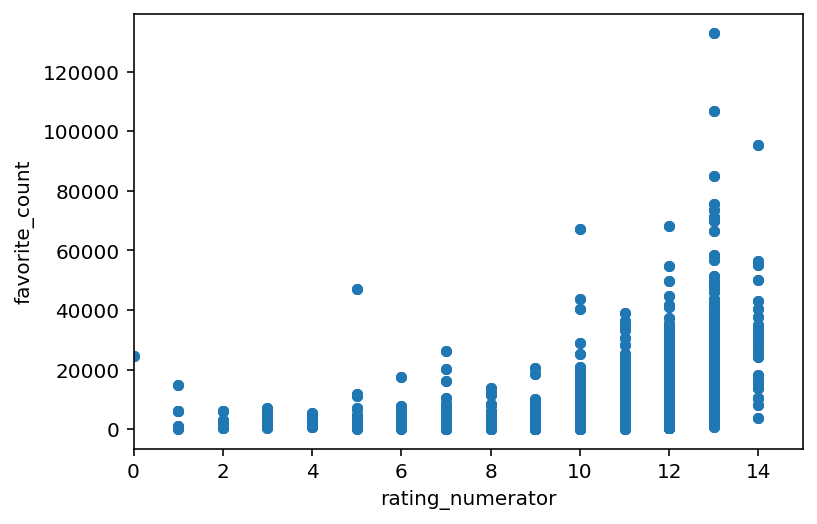

In [61]:
df_merged_c.plot.scatter(x='rating_numerator',y='favorite_count',xlim=(0,15))

Comment: From the scatter plot above, there is a positive correlation between favorite_count and rating_numerator (assumption is made that most of these ratings have a denominator of 10). Seems like both @WeRateDogs and their followers agree on the cutest dogs!

# Sources:
1. Stackoverflow
2. CoCalc
3. Kanoki
4. Data36
5. GeekforGeeks
6. pandas.pydata.org
7. nfpdiscussions.udacity.com

# The End